# brookerichards_applied.ipynb
### Brooke Richards 6/13/2024  
https://github.com/Karpoozi/datafun-07-ml
#### In this project I will build a model, make predictions, visualize the model and publish my insights.

## Project Start

In [35]:
# import dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line

#### Intro to Linear Relationships

Variables with a linear relationship means that when one variable increases (or decreases), the other variable also increases (or decreases) at a constant rate. The relationship between Fahrenheit and Celsius is a good example of this. 

In [36]:
# create function to calculate Celsius temperatures to Fahrenheit
c = lambda f: 5 / 9 * (f - 32)

# use the lambda to calculate celsius equivalents of the fahrenheit temperatures 0–100 in 10-degree increments
temps = [(f, c(f)) for f in range(0, 101, 10)]

#### Place the Data in a DataFrame

In [37]:
# create dataframe 
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

#### Display Plot

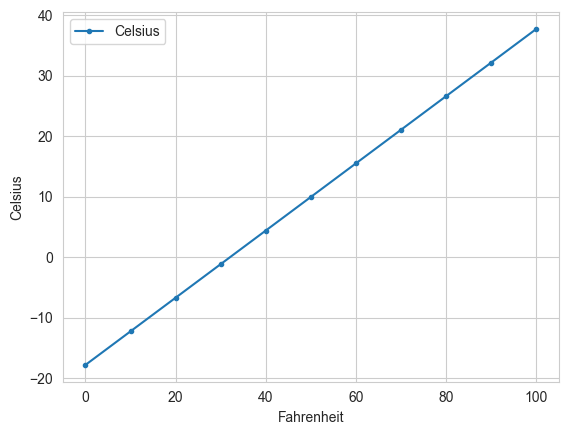

In [38]:
# organize plot
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# manually label the y-axis
y_label = axes.set_ylabel('Celsius')

## Part 2 Predict

### Section 1 - Data Acquisition

In [39]:
# download the data file to your project folder and then load the data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [40]:
# inspect head
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [41]:
# inspect tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [42]:
# rename dataframe columns for readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# verify changes
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [43]:
# the x-axis labels will be more readable if they do not contain 01 for January 
nyc_df.Date.dtype # check the column data type
nyc_df.Date = nyc_df.Date.floordiv(100) # each column in df is a Series, the floordiv method performs integer division on every element of the Series

# verify changes
nyc_df.head(3) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [44]:
# round statistics to .00
pd.set_option('display.precision', 2)

# display temperature stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [45]:
# use linregress function to calculate slope and intercept for the best fit line through the data
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [46]:
# determine slope
linear_regression.slope

0.014771361132966163

In [47]:
# determine y coordinate of the y intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [48]:
# calculate the average high temp in Jan 2024
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

(10.0, 70.0)

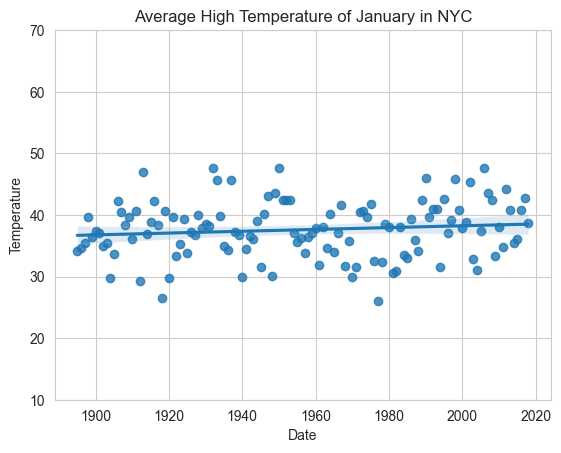

In [49]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_title('Average High Temperature of January in NYC')
axes.set_ylim(10, 70)

## Part 3 Predict

In [50]:
# use test_train_split to split the data into parts for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

In [51]:
# check the shape of each data set
X_train.shape

(93, 1)

In [52]:
# check the shape of each data set
X_test.shape

(31, 1)

In [53]:
# train the model using Linear Regression Fit
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [54]:
# view the returned coef_ attribute
linear_regression.coef_

array([0.01939167])

In [55]:
# view the returned intercept_  attribute
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [56]:
#test the model by displaying the predicted and expected values for every fifth element
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


###  Section 3 - Predict

In [57]:
# predict the average high temp in NYC in Jan for the year 2024
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [58]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [59]:
predict(1890)

array([36.34246432])

### Section 3 - Visualizations

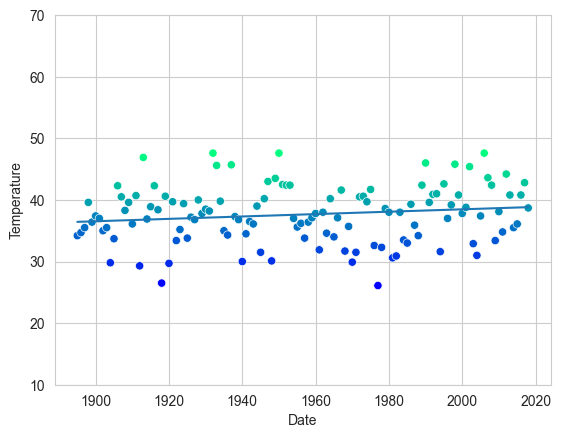

In [60]:
# plot the data
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x= np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights

When comparing the straight line chart and the linear regression model for studying temperature trends, each method has its own pros and cons. The straight line chart is like a simple graph that shows temperature changes over time in an easy-to-understand way. You can quickly see if it's getting hotter or colder over the years. But, it's just for looking at trends visually - it doesn't help us predict temperatures accurately.

On the other hand, the linear regression model is more like using math to figure out how temperature changes over time. It uses statistics to make predictions based on past data. So, if we want to know what the temperature might be in the future, this model can give us a better idea. But, it's a bit more complicated because it assumes that temperature changes happen in a straight line, which might not always be true.

So, in simple terms, the straight line chart is good for seeing basic trends, while the linear regression model helps us make more precise predictions. But, both have their strengths and weaknesses, and it depends on what we need to know about temperature changes over time.

## Part 5 - Bonus

In [61]:
# load the dataset
california = fetch_california_housing()

In [62]:
# display the dataset's description
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [63]:
california.data.shape

(20640, 8)

In [64]:
california.target.shape

(20640,)

In [65]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [ ]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df['MedHouseValue'] = pd.Series(california.target)

california_df.head()

In [ ]:
california_df.describe()

In [ ]:
sample_df = california_df.sample(frac=0.1, random_state=17)
sns.set(font_scale=2)
sns.set_style('whitegrid')
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
linear_regression= LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

In [ ]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

linear_regression.intercept_

## Part ? - Testing

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [ ]:
predicted[:5]

In [ ]:
expected[:5]

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

In [ ]:
metrics.r2_score(expected, predicted)

In [ ]:
metrics.mean_squared_error(expected, predicted)

In [ ]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [ ]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')